# Model params tuning (RF and ridge)

## RF

In [ ]:
#- Tune parameters for RF
%run scripts/calibration/RF_tune.py #use this in terminal in different steps

In [ ]:
#- Pool and plot the results for RF
%run scripts/calibration/RF_post_tune.py

## Ridge

In [ ]:
#- Tune for ridge
%run scripts/calibration/ridge_tune.py

In [ ]:
#- Pool and plot the results for ridge
%run scripts/calibration/ridge_post_tune.py

In [ ]:
scores = [[np.ones(4), 2*np.ones(4), 3*np.ones(4)], [np.ones(4), 2*np.ones(4), 3*np.ones(4)]]
scores_pool = np.stack(scores,axis=2)
print('pool',scores_pool)
scores_mean = np.mean(scores_pool, axis=2)
print('mean',scores_mean)
params = ['p1','p2','p3','p4']
best_indices = np.argmax(scores_mean, axis=1)
print(best_indices)
best_scores = np.max(scores_mean, axis=1)
print(best_scores)
best_params = [params[i] for i in best_indices]

In [ ]:
import numpy as np
from sklearn.model_selection import LeaveOneOut
X = np.array([[1, 2], [3, 4],[3, 4]])
loo = LeaveOneOut()
print(loo.get_n_splits(X))

for i, (train_index, test_index) in enumerate(loo.split(X)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

# GRN 

## RF

In [ ]:
# run this one from terminal, as it needs to be run in seperate sessions (1000 runs)
%run scripts/GRN/RF_grn.py

In [3]:
#pool the links and add oob scores to the df
%run scripts/GRN/RF_grn_pool.py

GRN results are successfully pooled for RF


## Ridge

In [ ]:
%run scripts/GRN/ridge_grn.py

## Portia

In [ ]:
%run scripts/GRN/portia_grn.py

## plot best scores (RF and Ridge)

In [ ]:
%run scripts/GRN/plot_grn_scores.py 

## Plot distribution of mean weights (all methods)

In [ ]:
%run scripts/GRN/plot_grn_mean_weights.py  

## Plot distribution of top links for different repeatition (RF)

In [ ]:
%run scripts/GRN/plot_grn_weights_distribution.py

# Compare different methods: matching with string

In [ ]:
%run scripts/vs_string/vs_distribution.py

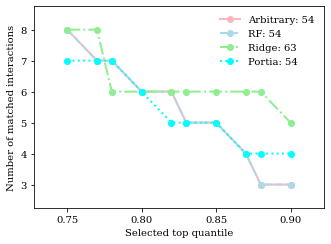

In [1]:
%run scripts/vs_string/vs_series.py

# Filter (on hold)

## create edges and nodes

In [ ]:
links_short_ctr_portia = pd.read_pickle(os.path.join(OUTPUT_DIR,'GRN','links_short_ctr_portia.csv'))
links_short_sample_portia = pd.read_pickle(os.path.join(OUTPUT_DIR,'GRN','links_short_mg_portia.csv'))

def process_nodes_edges(study, links, scores=None):
    #- create nodes and edges
    nodes, edges = utils.convert_links_to_nodes_edges(links, protnames, scores)
    #- output edges and nodes   
    utils.read_write_nodes_edges(nodes=nodes, edges=edges, study=study, mode='write', OUTPUT_DIR=OUTPUT_DIR)
process_nodes_edges('ctr', links_short_ctr_portia)
process_nodes_edges('mg', links_short_sample_portia)

# Vester's sensitivity analysis. 
- AS: active sum. Sum along rows of the influence matrix and it indicates how much does a variable influence all the others.
- PS: passive sum. Its is the sum along columns of the influence matrix and it indicates how sensitive a variable is, how does it react to the influence of others
- Q: AS/PS -> how dominant
- P: AS.PS -> how participative a variable is
- Active: +Q
- Passive: -Q, -P
- Critical: +Q, +P
- Buffering: -Q, -P

## VSA and Role change

In [ ]:
%run scripts/VSA/step1.py 

# Sensitivity analysis

## multiplicative gaussian noise

In [ ]:
importlib.reload(utils)
#- retreive data
df_role_change = pd.read_csv(os.path.join(OUTPUT_DIR,'VSA','df_role_change.csv'),index_col=False)
target_prots = df_role_change['Entry'].values.tolist() 

method = 'portia'
links_ctr = pd.read_pickle(os.path.join(OUTPUT_DIR,'GRN',f'links_short_ctr_{method}.csv'))
links_sample = pd.read_pickle(os.path.join(OUTPUT_DIR,'GRN',f'links_short_mg_{method}.csv'))
#- multiplicative gaussian noise
# utils.sensitivity_analysis.multiGaussNoise(links_ctr, links_sample, protnames, target_prots, OUTPUT_DIR)
#- additive gaussian noise
utils.sensitivity_analysis.addGaussNoise(links_ctr, links_sample, protnames, target_prots, OUTPUT_DIR)

In [23]:
a = np.array([[1,2], [3]], dtype=list)
np.hstack(a)


array([1, 2, 3])

# Visualize protein network 

In [ ]:
importlib.reload(utils)
with open(os.path.join(OUTPUT_DIR, 'postprocess/map_protname_genename.json')) as f:
    map_protname_genename = json.load(f)['map']
# preferred_names = [map_protname_genename[protname] for protname in protnames]
preferred_names =protnames
def visualize(study):
    #- retreive nodes and edges
    nodes, edges = utils.read_write_nodes_edges(study=study, mode='read', OUTPUT_DIR=OUTPUT_DIR)
    utils.visualize_network(nodes, edges, 'ctr', protnames, preferred_names, OUTPUT_DIR)
visualize('ctr')

In [ ]:
import igraph
igraph.drawing.shapes.DiamondDrawer()